<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg"  width=400></p>

<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

In [0]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import torch

In [0]:
np.random.seed(42)

### 1. Градиентный спуск: повторение

Рассмотрим функцию от двух переменных:

In [0]:
def f(x1, x2):
    return np.sin(x1)**2 + np.sin(x2) ** 2

***Reminder:***  
Что мы хотим? Мы хотим найти минимум этой функции (в машинному обучении мы обычно хотим найти минимум **функции потерь**, например, MSE), а точнее найти x1 и x2 такие, что при них значение f(x1,x2) минимально, то есть *точку экстремума*.  
Как мы будем искать эту точку? Используем методы оптимизации (=минимизации в нашем случае). Одним из таких методов и является градиентный спуск. 

Реализуем функцию, которая будет осуществлять градиентный спуск для функции f:

*Примечание:* Вам нужно посчитать частные производные именно **аналитически** и **переписать их в код**, а не считать производные численно (через отношение приращения функции к приращению аргумента) -- в этих двух случаях могут различаться ответы, поэтому будьте внимательны

In [0]:
def grad_descent(lr, num_iter=100, cur_x1=1.5, cur_x2=-1):
    """
    функция, которая реализует градиентный спуск в минимум для функции f от двух переменных. 
        param lr: learning rate алгоритма
        param num_iter: количество итераций градиентного спуска
    """
    global f
    # будем сохранять значения аргументов и значений функции в процессе град. спуска в переменную states
    steps = []
    
    # итерация цикла -- шаг градиентнго спуска
    for iter_num in range(num_iter):
        steps.append([cur_x1, cur_x2, f(cur_x1, cur_x2)])
        
        # чтобы обновить значения cur_x1 и cur_x2, как мы помним с последнего занятия, 
        # нужно найти производные (градиенты) функции f по этим переменным.
        grad_x1 = 2*np.sin(cur_x1)*np.cos(cur_x1)
        grad_x2 = 2*np.sin(cur_x2)*np.cos(cur_x2)
                 
        # после того, как посчитаны производные, можно обновить веса. 
        # не забудьте про lr!
        cur_x1 -= lr*grad_x1
        cur_x2 -= lr*grad_x2
    return np.array(steps)

In [0]:
steps = grad_descent(lr=0.5, num_iter=10)

Визуализируем точки градиентного спуска на 3D-графике нашей функции. Звездочками будут обозначены точки (тройки x1, x2, f(x1, x2)), по которым Ваш алгоритм градиентного спуска двигался к минимуму.

(Для того, чтобы написовать этот график, мы и сохраняли значения cur_x1, cur_x2, f(cur_x1, cur_x2) в steps в процессе спуска)

Если у Вас правильно написана функция grad_descent, то звездочки на картинке должны сходиться к одной из точку минимума функции. Вы можете менять начальные приближения алгоритма, значения lr и num_iter и получать разные результаты.

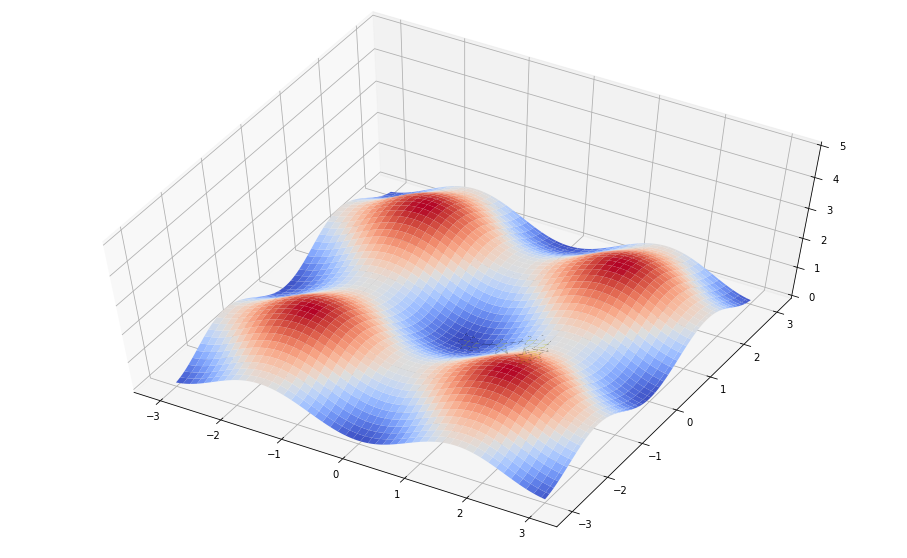

In [0]:
# %matplotlib osx

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

path = []

X, Y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

fig = plt.figure(figsize=(16, 10))
ax = fig.gca(projection='3d')

ax.plot(xs=steps[:, 0], ys=steps[:, 1], zs=steps[:, 2], marker='*', markersize=20,
                markerfacecolor='y', lw=3, c='black')

ax.plot_surface(X, Y, f(X, Y), cmap=cm.coolwarm)
ax.set_zlim(0, 5)
ax.view_init(elev=60)
plt.show()

#### Задание 1.
Запустите Вашу функцию grad_descent c параметрами lr=0.3, num_iter=20 и начальными приближениями  cur_x1, cur_x2 = 1.5, -1.


In [0]:
steps = grad_descent(lr=0.3, num_iter=20,cur_x1=1.5, cur_x2=-1)
np.sum(steps[-1]) * 10**6

5.8474610183441325

In [0]:
steps[-1]

array([ 5.93854797e-06, -9.11222218e-08,  3.52746552e-11])

### 2. Linear Regression

В данном пункте мы реализуем метод градиентного спуска для задачи регрессии


$$Y = X*W + \vec{b} + \varepsilon$$

Обратите внимание, что Y - матрица размера $[n\_samples, n\_targets]$, т.е. для каждого объекта мы будем предсказывать не 1 число, а $n\_targets$ чисел. Такая модель будет полезна в будущем, когда вы столкнетесь с полносвязным слоем в нейронных сетях

In [0]:
X, Y = datasets.make_regression(n_targets=3, n_features=2, noise=10, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [0]:
X.shape[1]

2

*Напоминание*

Для отыскания значения параметров мы будем минимизировать *MSE*

$Q(X,Y,W) = \frac{1}{n}\|Y - X*W\|_2^2$

где $n$ - количество элементов выборки

В градиентном спуске на следующем шаге значения параметров получаются из значений на текущем шаге смещением в сторону антиградиента функции потерь:

$$W_{(k+1)} = W_{(k)} - \eta_k \nabla Q(W_{(k)}),$$
где $\eta_t$ — длина шага (learning rate).

Градиент в случае MSE выглядит следующим образом:

$$\nabla Q(W) = \frac{2}{n}X^T(X*W - Y)$$

!!У нас есть несколько переменных, чтобы получить MSE нужно посчитать сумму квадратов ошибок и поделить на n, а не на nk, где n - размер выборки, а k - количество фичей, для MAE так же!!


In [0]:
class LinearRegression:

    def __init__(self, mae_metric=False):
        """
            @param mae_metrics: В случае True необходимо следить за
            метрикой MAE во время обучения, иначе - за метрикой MSE
        """
        self.metric = self.calc_mse_metric if not mae_metric else self.calc_mae_metric
    
    def calc_mae_metric(self, preds, y):
        """
            @param preds: предсказания модели
            @param y: истиные значения
            @return mae: значение MAE
        """
       
    
    def calc_mse_metric(self, preds, y):
        """
            @param preds: предсказания модели
            @param y: истиные значения
            @return mse: значение MSE
        """
        return np.sum((y - preds)**2) / y.shape[0]
    
    def init_weights(self, input_size, output_size):
        """
            Инициализирует параметры модели
            W - матрица размерности (input_size, output_size)
            инициализируется рандомными числами из
            нормального распределения (np.random.normal)
            со средним 0 и стандартным отклонением 0.01
            b - вектор размерности (1, output_size)
            инициализируется нулями
        """
        np.random.seed(42)
        self.W = np.random.normal(0, 1, (input_size, output_size))
        self.b = np.zeros((1, output_size))

    def fit(self, X, y, num_epochs=250, lr=0.01):
        """
            Обучение модели линейной регрессии методом градиентного спуска
            @param X: размерности (num_samples, input_shape)
            @param y: размерности (num_samples, output_shape)
            @param num_epochs: количество итераций градиентного спуска
            @param lr: шаг градиентного спуска
            @return metrics: вектор значений метрики на каждом шаге градиентного
            спуска. В случае mae_metric==True вычисляется метрика MAE
            иначе MSE
        """
        self.init_weights(X.shape[1], y.shape[1])
        metrics = []
        for _ in range(num_epochs):
            #preds = self.predict(X)
            # сделайте вычисления градиентов без циклов,
            # используя только numpy
            b_grad = np.mean(2 * (X@self.W + self.b - y), axis=0)
            W_grad = 2/X.shape[0] * X.T@(X@self.W + self.b - y)
            self.W -= lr * W_grad
            self.b -= lr * b_grad
            preds = self.predict(X)
            metrics.append(self.metric(preds, y))

        return metrics

    def predict(self, X):
        """
            Думаю, тут все понятно. Сделайте свои предсказания :)
        """
        return X @ self.W+self.b

In [0]:
model = LinearRegression()
mse = model.fit(X_train, Y_train)

In [0]:
(np.sum((Y_train - model.predict(X_train))**2)) / Y_train.shape[0]

284.41310361750794

In [0]:
np.sum((Y_train - model.predict(X_train))**2)/Y_train.shape[0]

284.4131036055069

In [0]:
Y_test

array([[-153.91561337, -122.85463634, -107.77618666],
       [  14.48691206,   11.14890046,   -2.17674316],
       [-112.9461553 ,  -93.83654864,  -99.27480479],
       [-105.42463973,  -84.70000771,  -61.33325702],
       [  25.92268169,   28.31616247,   34.8066054 ],
       [  99.54224094,   90.7239294 ,   78.82300663],
       [  77.24069296,   31.75273455,   33.26679138],
       [ -20.67114234,   21.48149112,   29.2360418 ],
       [ 100.49868948,   30.19719157,   28.42891675],
       [ -64.4352075 ,  -55.43839723,  -70.8161578 ],
       [-175.21470574, -161.27416469, -159.77140083],
       [  18.34383164,    8.67216206,   16.01109802],
       [  35.78407413,   -1.51596446,  -14.59246689],
       [-128.60788251,  -55.57170079,  -75.38886864],
       [ -34.92066616,  -27.68104295,  -46.69070011],
       [   8.00414422,   26.02392434,   -1.09469387],
       [ 192.16295043,  140.53206094,  117.00925511],
       [-151.286747  ,  -88.84265103,  -72.43263228],
       [ -53.49591712,  -23.

In [0]:
xzx=torch.IntTensor(range(250))

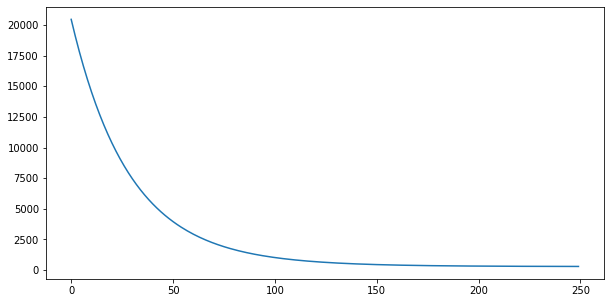

In [0]:
# Постройте график для MSE
plt.figure(figsize=(10, 5))
plt.plot(xzx, mse, label='real')

#### Задание 2.

1. Зафиксируйте `random.seed == 42`
2. Сгенерируйте данные с помощью `make_regression` с параметами `n_targets=3, n_features=2, noise=10, random_state=42`. С помощью `train_test_split` разделите данные на обучение и тест 
3. Обучите модель линейной регрессии с параметрами по умолчанию.

####  Задание 3.

1. Обучите модель линейной регрессии на тех же данных. В этот раз считайте MAE

### Логистическая регрессия

Теперь будем решать задачу классификации при помощи логистической регрессии

In [0]:
X, y = datasets.make_blobs(n_samples=10000, n_features=2, centers=2, random_state=42)
y = y[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

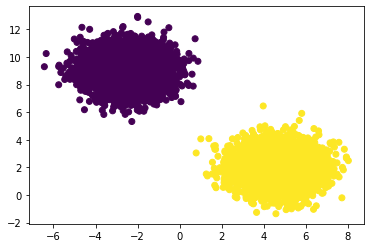

In [0]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train[:, 0])
plt.show()

In [0]:
X.shape
print (X[0:3], '\n', y[0:3])

[[ 4.21810197  1.83852559]
 [ 5.55650652  2.25768167]
 [-2.1884119   9.20833807]] 
 [[1]
 [1]
 [0]]


Небольшое напоминание по логистической регрессии:

Сигмоида
$$ \sigma(h) = \frac{1}{1 + exp(-h)} $$

Вероятность принадлежности к классу

$$ P(y = 1 | x, w) = \sigma(x, w) $$

Логистическая функция потерь

$$ L(y, p) = - \frac{1}{m}\sum_{1}^{m}(y_i log(p_i) + (1 - y_i) log(1 - p_i)) $$

In [0]:
class LogisticRegressionGD:
    '''
    A simple logistic regression for binary classification with gradient descent
    '''
    
    def __init__(self):
        pass
    
    def __extend_X(self, X):
        """
            Данный метод должен возвращать следующую матрицу:
            X_ext = [1, X], где 1 - единичный вектор
            это необходимо для того, чтобы было удобнее производить
            вычисления, т.е., вместо того, чтобы считать X@W + b
            можно было считать X_ext@W_ext 
        """
        #
        return  np.insert(X,0,[1],axis=1)
    
    def init_weights(self, input_size, output_size):
        """
            Инициализирует параметры модели
            W - матрица размерности (input_size, output_size)
            инициализируется рандомными числами из
            нормального распределения со средним 0 и стандартным отклонением 0.01
        """
        np.random.seed(42)
        #self.W = 
        self.W = np.random.normal(0, 0.01, (input_size, output_size)) 
    def get_loss(self, p, y):
        """
            Данный метод вычисляет логистическую функцию потерь
            @param p: Вероятности принадлежности к классу 1
            @param y: Истинные метки
        """
        #return 
        return (np.sum(-y * np.log(p) - (1 - y) * np.log(1 - p)))/y.shape[0]
    def get_prob(self, X):
        """
            Данный метод вычисляет P(y=1|X,W)
            Возможно, будет удобнее реализовать дополнительный
            метод для вычисления сигмоиды
        """
        if X.shape[1] != self.W.shape[0]:
            X = self.__extend_X(X)
        sigmoid=(-X@self.W)
        return 1/(1+np.exp(sigmoid))
        #return 1/(1 + np.exp(-1 * (X @ self.W)))

    
    def get_acc(self, p, y, threshold=0.5):
        """
            Данный метод вычисляет accuracy:
            acc = \frac{1}{len(y)}\sum_{i=1}^{len(y)}{I[y_i == (p_i >= threshold)]}
        """
        correct = 0
        pred=p>=threshold
        correct=y==pred
        accuracy=(correct.sum())/len(y)
        return accuracy

    def fit(self, X, y, num_epochs=100, lr=0.001):
        
        X = self.__extend_X(X)
        self.init_weights(X.shape[1], y.shape[1])
        
        accs = []
        losses = []
        for _ in range(num_epochs):
            p = self.get_prob(X)

            W_grad = np.dot(X.T, (p - y)) / len(y)
            #W_grad = X.T @ (p-y) /len(y)
            self.W -=lr * W_grad
            
            # необходимо для стабильности вычислений под логарифмом
            p = np.clip(p, 1e-10, 1 - 1e-10)
            
            log_loss = self.get_loss(p, y)
            losses.append(log_loss)
            acc = self.get_acc(p, y)
            accs.append(acc)
        
        return accs, losses

In [0]:
model = LogisticRegressionGD()
accs, losses = model.fit(X_train, y_train)

In [0]:
xzx=torch.IntTensor(range(100))

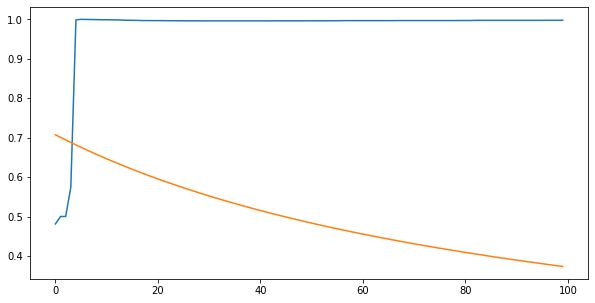

In [0]:
plt.figure(figsize=(10, 5))
plt.plot(xzx, accs, label='real')
plt.plot(xzx, losses)

In [0]:
y

array([[1],
       [1],
       [0],
       ...,
       [1],
       [0],
       [1]])

In [0]:
asd-= W_grad*0.01
asd

array([[ 0.49301381],
       [-0.11967756],
       [ 0.60482755]])

In [0]:
model = LogisticRegressionGD()
accs, losses = model.fit(X_train, y_train)

In [0]:
# Постройте графики для accuracy и для loss
#YOUR_CODE

#### Задание 4

1. Реализуйте все методы класса `LogisticRegressionGD`
2. Создайте модель и обучите ее с параметрами по умолчанию на train данных
3. по полученным `accs` и  `losses` посчитайте среднее.
4. Посчитайте accuracy на test данных. `threshold=0.5`.

### Logistic regresion with SGD

Сложность вычисления в случае с GD $O(kn)$, где $k$ - размер вектора признаков, $n$ - размер всей выборки.
В случае, когда выборка очень большая, это решение становится непрактичным

GD заменяют на SGD - *Стохастический градиентный спуск*. Он отличается от обычного заменой градиента на несмещённую оценку по одному или нескольким объектам. В этом случае сложность становится  $O(kl)$ , где  $l$  — количество объектов, по которым оценивается градиент,  $l << n$.

In [0]:
def batch_generator(X, y, batch_size=100):
    """
        Необходимо написать свой генератор батчей.
        Если вы не знаете, что такое генератор, то, возможно,
        вам поможет
        https://habr.com/ru/post/132554/
        В данном генераторе не надо перемешивать данные
    """
    num_samples = X.shape[0]
    # Заметьте, что в данном случае, если num_samples не делится на batch_size,
    # то последние элементы никогда не попадут в обучение
    # в данном случае нас это не волнует
    num_batches = int(num_samples / batch_size)
    for i in range(num_batches-1):
        # Необходимо отдать batch_size обьектов и соответствующие им target
        yield (X[i::batch_size], y[i::batch_size])

class LogisticRegressionSGD:
    def __init__(self):
        pass
    
    def __extend_X(self, X):
        """
            Данный метод должен возвращать следующую матрицу:
            X_ext = [1, X], где 1 - единичный вектор
            это необходимо для того, чтобы было удобнее производить
            вычисления, т.е., вместо того, чтобы считать X@W + b
            можно было считать X_ext@W_ext
        """
        return np.insert(X,0,[1],axis=1)

    def init_weights(self, input_size, output_size):
        """
            Инициализирует параметры модели
            W - матрица размерности (input_size, output_size)
            инициализируется рандомными числами из
            нормального распределения со средним 0 и стандартным отклонением 0.01
        """
        np.random.seed(42)
        self.W = np.random.normal(0, 0.01, (input_size, output_size))
        
    def get_loss(self, p, y):
        """
            Данный метод вычисляет логистическую функцию потерь
            @param p: Вероятности принадлежности к классу 1
            @param y: Истинные метки
        """
        return (np.sum(-y * np.log(p) - (1 - y) * np.log(1 - p)))/y.shape[0]
    
    def get_prob(self, X):
        """
            Данный метод вычисляет P(y=1|X,W)
            Возможно, будет удобнее реализовать дополнительный
            метод для вычисления сигмоиды
        """
        if X.shape[1] != self.W.shape[0]:
            X = self.__extend_X(X)
        sigmoid=(-X@self.W)
        return 1/(1+np.exp(sigmoid))
    
    def get_acc(self, p, y, threshold=0.5):
        """
            Данный метод вычисляет accuracy:
            acc = \frac{1}{len(y)}\sum_{i=1}^{len(y)}{I[y_i == (p_i >= threshold)]}
        """
        correct = 0
        pred=p>=threshold
        correct=y==pred
        accuracy=(correct.sum())/len(y)
        return accuracy

    def fit(self, X, y, num_epochs=10, lr=0.001):
        
        X = self.__extend_X(X)
        self.init_weights(X.shape[1], y.shape[1])
        
        accs = []
        losses = []
        for _ in range(num_epochs):
            gen = batch_generator(X, y)
            for X_, y_ in gen:
                p = self.get_prob(X_)

                W_grad = np.dot(X_.T, (p - y_)) / len(y_)
                self.W -= lr* W_grad

                # необходимо для стабильности вычислений под логарифмом
                p = np.clip(p, 1e-10, 1 - 1e-10)

                log_loss = self.get_loss(p, y_)
                losses.append(log_loss)
                acc = self.get_acc(p, y_)
                accs.append(acc)
        
        return accs, losses

In [0]:
model = LogisticRegressionSGD()
accs, losses = model.fit(X_train, y_train)

In [0]:
xzx=torch.IntTensor(range(740))

In [0]:
np.shape(losses)

(740,)

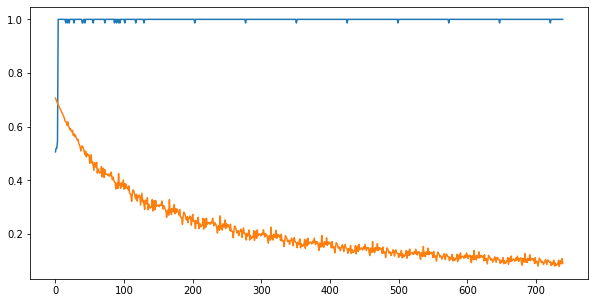

In [0]:
plt.figure(figsize=(10, 5))
plt.plot(xzx, accs, label='real')
plt.plot(xzx, losses)

NameError: ignored

(10000, 2)

In [0]:
# Постройте графики для accuracy и для loss
#YOUR_CODE

В данном случае модель тренируется значительно дольше, чем c *Gradient Decent*. Попробуйте объяснить, почему так происходит

#### Задание 5

1. Реализуйте все методы класса `LogisticRegressionSGD`
2. Создайте модель и обучите ее с параметрами по умолчанию на train данных
3. по полученным `accs` и  `losses` посчитайте среднее. 
4. Посчитайте accuracy на test данных. `threshold=0.5`. 